# Jupyter Notebook Workshop
## Analyzing and visualizing data from spreadsheets

![title](https://www.universetoday.com/wp-content/uploads/2018/10/moon-flyby.png)

### Run the following cell before the workshop. Click inside the box below, and hit the "Run" button in the toolbar at the top

In [1]:
# Install relevant packages for python to R integration
import sys
!conda install --yes --prefix {sys.prefix} rpy2
!conda install --yes --prefix {sys.prefix} tzlocal

## Titanic Tutorial

This dataset is part of a tutorial from Kaggle, found here: https://www.kaggle.com/c/titanic/data

In [15]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import rpy2

Import qualtrics output

In [16]:
work_dir = os.path.expanduser('/Users/haroonpopal/Google_Drive/olson_lab/lab_meetings/summer_workshops_2019/jupyter_introduction')
os.chdir(work_dir)

train = pd.read_csv("train.csv")
train_shape = train.shape
print(train_shape)

(891, 12)


In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

# sex_pivot.plot.bar()
# plt.show()

,Survived
Sex,
female,0.742038
male,0.188908


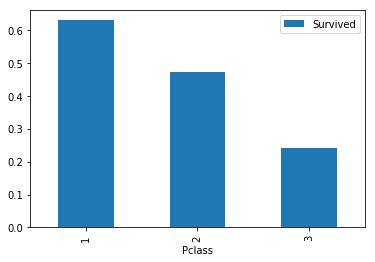

In [6]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
# pclass_pivot
pclass_pivot.plot.bar()
plt.show()

In [7]:
train['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
train[train["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


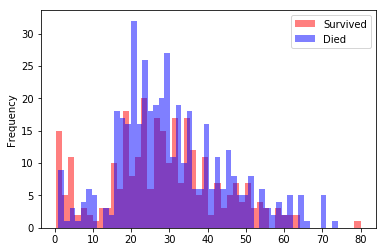

In [9]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

## Install the bash kernel
Run this in a terminal window:

`pip install bash_kernel
python -m bash_kernel.install`

Then use the bash kernel to install the jupyter variable inspector so that you can view info about variables you have create in the notebook

In [1]:
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user

jupyter nbextension enable varInspector/main

[I 14:25:24 InstallContribNbextensionsApp](B jupyter contrib nbextension install --user
[I 14:25:24 InstallContribNbextensionsApp](B Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 14:25:24 InstallContribNbextensionsApp](B Installing /Users/haroonpopal/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband -> rubberband
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/rubberband/icon.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/rubberband/main.css


[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/rubberband/readme.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/rubberband/main.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/rubberband/rubberband.yaml
[I 14:25:24 InstallContribNbextensionsApp](B - Validating: OK
[I 14:25:24 InstallContribNbextensionsApp](B Installing /Users/haroonpopal/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/scroll_down -> scroll_down
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scroll_down/icon.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scroll_down/config.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scroll

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/table_beautifier/main.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/table_beautifier/table_beautifier.yaml
[I 14:25:24 InstallContribNbextensionsApp](B - Validating: OK
[I 14:25:24 InstallContribNbextensionsApp](B Installing /Users/haroonpopal/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/freeze -> freeze
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/freeze/icon.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/freeze/config.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/freeze/readme.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/freeze/main.

[I 14:25:24 InstallContribNbextensionsApp](B - Validating: OK
[I 14:25:24 InstallContribNbextensionsApp](B Installing /Users/haroonpopal/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/scratchpad -> scratchpad
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scratchpad/LICENSE
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scratchpad/scratchpad.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scratchpad/README.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scratchpad/main.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scratchpad/scratchpad.css
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/scratchp

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/snippets_menu/snippets_submenus_python/sympy.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/snippets_menu/snippets_submenus_python/numpy.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/snippets_menu/snippets_submenus_python/astropy.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/snippets_menu/snippets_submenus_python/pandas.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/snippets_menu/snippets_submenus_python/numpy_polynomial.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/snippets_menu/snippets_submenus_python/scipy_constants.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to 

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/readme_add_new_link.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/main.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/readme_dropdown.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/quickhelp_shim.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/readme_add_new_select_action.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/kse_components.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/python-markdown/python-markdown-post.png
[I 14:25:24 InstallContribNbextensionsApp](B - Validating: OK
[I 14:25:24 InstallContribNbextensionsApp](B Installing /Users/haroonpopal/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/codefolding -> codefolding
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/codefolding/codefolding_editor.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/codefolding/icon.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/codefolding/codefolding_firstline_folded.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/codefolding/codefolding_indent_folded_2.png
[I 14:25:24 InstallContribNbextension

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/codemirror_mode_extensions/codemirror_mode_extensions.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/codemirror_mode_extensions/main.js
[I 14:25:24 InstallContribNbextensionsApp](B - Validating: OK
[I 14:25:24 InstallContribNbextensionsApp](B Installing /Users/haroonpopal/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/ruler -> ruler
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/ruler/icon.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/ruler/edit.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/ruler/ruler_editor.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupy

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/export_highlights.ipynb
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/tst_highlights.html
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/export_highlights.tex
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/image.gif
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/readme.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/highlighter.css
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/highlighter/tst_highlights.pdf
[I 14:25:24 InstallContribNbextensionsApp](B Up to d

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/kernel_exec_on_cell.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/demo-jv.gif
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/README_2to3.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/2to3.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/README_autopep8.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/demo_2to3.gif
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/README_isort.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/demo-py.gif
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/kernel_exec_on_cell.js
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/demo-jv.gif
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/README_2to3.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/2to3.yaml
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/README_autopep8.md
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/code_prettify/demo_2to3.gif
[I 14:25:24 InstallContribNbextensionsApp](B Up to dat

[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/latex_env_doc.ipynb
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/LaTeX_envs_menu.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/latex_env_doc.tex
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/header.tex
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/Toggles.png
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/latex_env_doc.html
[I 14:25:24 InstallContribNbextensionsApp](B Up to date: /Users/haroonpopal/Library/Jupyter/nbextensions/latex_envs/doc/example.png
[I 14:25:24 InstallContribNbextensionsApp

/Users/haroonpopal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


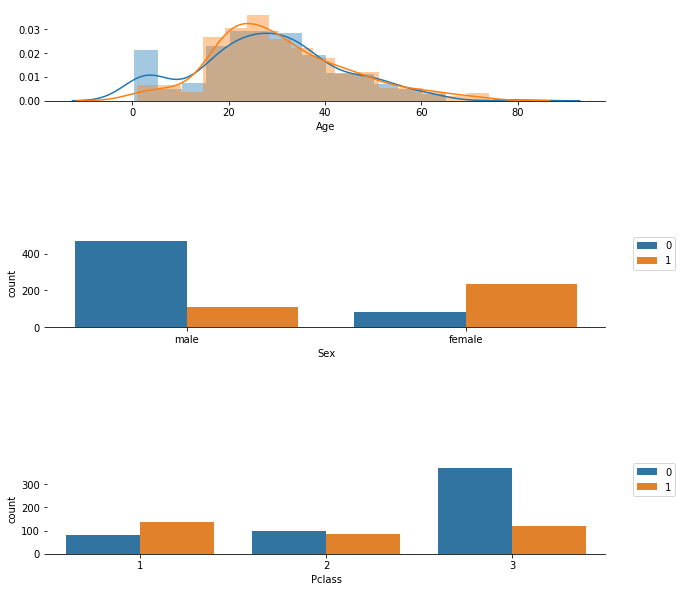

In [11]:
# Demographics
# Plot demographic information
# Set up the matplotlib figure
#sns.set(font_scale=1.2)
#sns.set_style("whitegrid")
f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=False)
f.subplots_adjust(wspace = 10, hspace=1.5)
sns.despine(left=True)
sns.distplot(survived['Age'].dropna(), ax=axes[0])
sns.distplot(died['Age'].dropna(), ax=axes[0])
sns.countplot(train['Sex'], hue=train['Survived'], ax=axes[1])
sns.countplot(train['Pclass'], hue=train['Survived'], ax=axes[2])
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Interactive Plots

[D3 Gallery](https://github.com/d3/d3/wiki/Gallery)

## Install the R kernel

Find the R kernel and installation instructions from this [link](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

In [1]:
train = read.csv('train.csv')
train[is.na(train)] <- 0

cor(train$Age, train$Survived, use='complete.obs')

[1] 0.01053922

## Use the python to R integration package

You can stay in the python kernel, but run R code with all the variables you have in python

In [13]:
%load_ext rpy2.ipython

In [14]:
%%R -i train
library(ggplot2)